# Manual Annotation

One of the common bioimage analysis tasks in manual annotation. This annotation could be to provide ground truth data for a machine learning algorithm or quality control any automated process.

There are 3 main types of manual annotation that napari provides, each corresponding to a different layer type
- adding points to mark particular locations in an image with the **Points** layer
- drawing 2D polygons to identify particular regions of interest with the **Shapes** layer
- painting labels to provide a pixel-wise annotation of an image with the **Labels** layer

This tutorial will explore these three manual annotations in **[napari](https://napari.org/)**, using that same data from the image visualization tutorial.

## Setup

Napari uses Qt for Graphical User Interface (GUI) so we must first create the Qt application before we can get started with `napari`.

In [3]:
%gui qt

ERROR:root:libGL.so.1: cannot open shared object file: No such file or directory


We can then import `napari`, our `nbscreenshot` utility and instantiate an empty viewer

In [4]:
from skimage import data
import napari
from napari.utils import nbscreenshot

# Create an empty viewer
viewer = napari.Viewer()

OSError: GL ES 2.0 library not found

In this tutorial we will just load our data directly into napari using the builtin plugin reader, this only works if you have the files in that relative path.

In [4]:
viewer.open('data/nuclei.tif', plugin='napari');

Another option is to load in some test data from skimage

In [ ]:
cells = data.cells3d()
viewer.add_image(
    cells,
    name=('membrane', 'nuclei'),
    channel_axis=1,
)
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

This now loads the 3D data into the napari viewer, and scrolling to the 30th z-slice should look as follows:

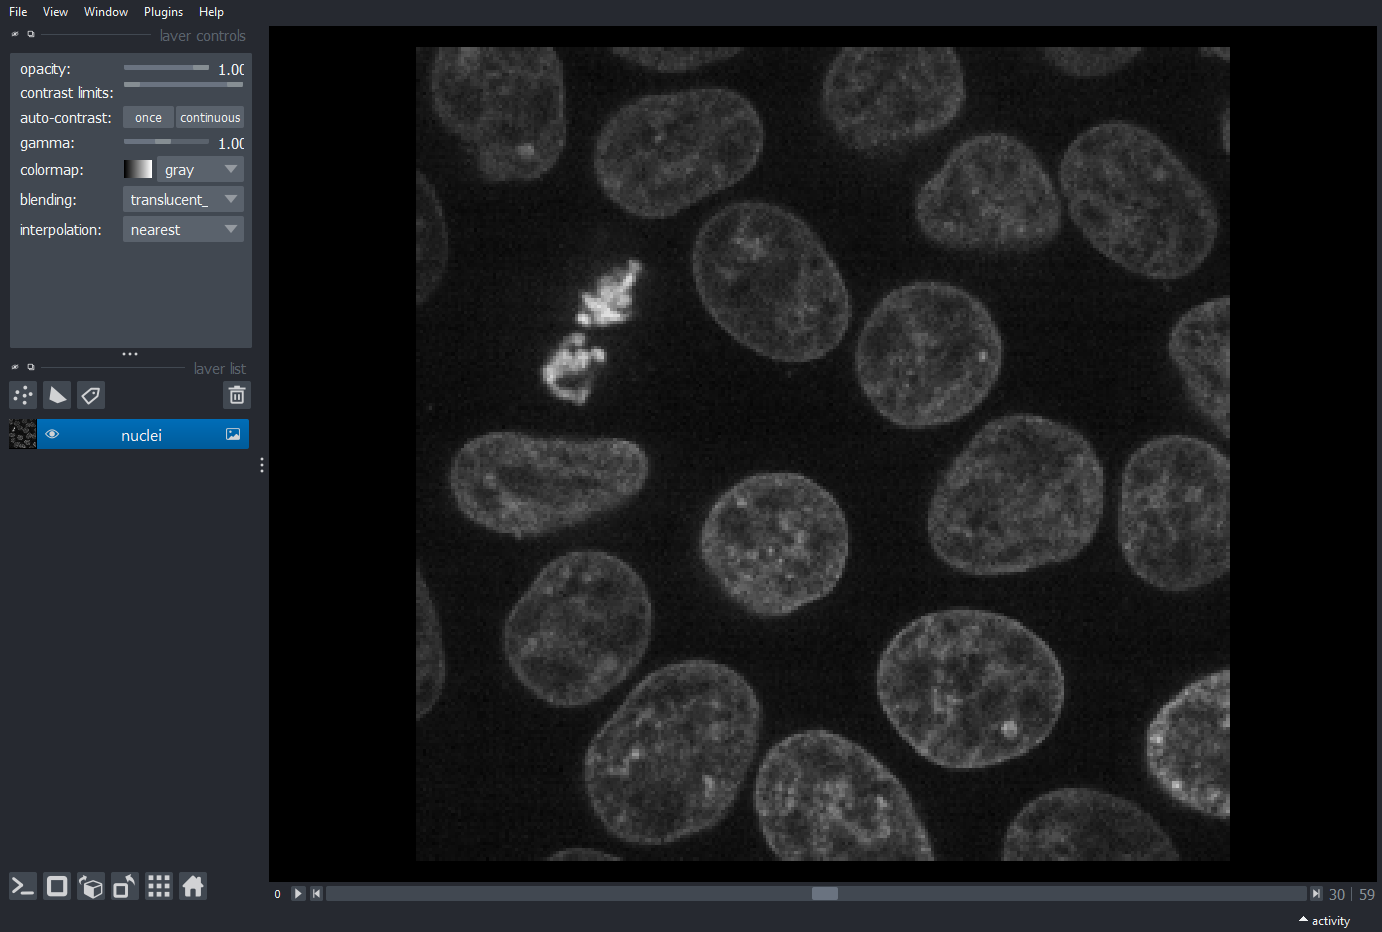

In [5]:
nbscreenshot(viewer)

## Annotating dividing and non-dividing cells using the points layer

One simple task that a biologist or bioimage analyst might be interseted in annotating each cell as diving or non-dividng.

In order to do this we are going to add two points layers to the viewer, one called `dividing` and one called `non-dividing` and set some basic properties on these layers.

You can add the layers using the new points button in the middle of the left panel of the viewer (left-most button featuring with many small dots), or you can add them programatically from the viewer. We'll add them programatically from the viewer for this example.

In [6]:
# add the first points layer for nondividing cells
viewer.add_points(name='nondividing',out_of_slice_display=True,ndim=3,face_color='#008ed0')
# add the second points layer for dividing cells
viewer.add_points(name='dividing',out_of_slice_display=True,ndim=3,face_color='#aa007f');

c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\

To add points you must enter add mode. This can be done by clicking on the add mode button in the top row of the control panel (2nd from the left, circle with a plus in it), or programatically from the notebook.

In [ ]:
# programatically enter add mode for both Points layers to enable editing
viewer.layers['dividing'].mode = 'add'
viewer.layers['nondividing'].mode = 'add'

Now start adding points, clicking once per cell, approximately in the center of the cell, with the appropriate `Points` layer selected. You can tell which `Points` layer is selected because it will be highlighted left in the layers list in the bottom left hand corner of the screen. You can rapidly switch between selected layers using the up and down keys. Also don't forget this is a z-slice so you should move up and down the slice, which can also be done with the left/ right key.

After annotation, my data looks as follows:

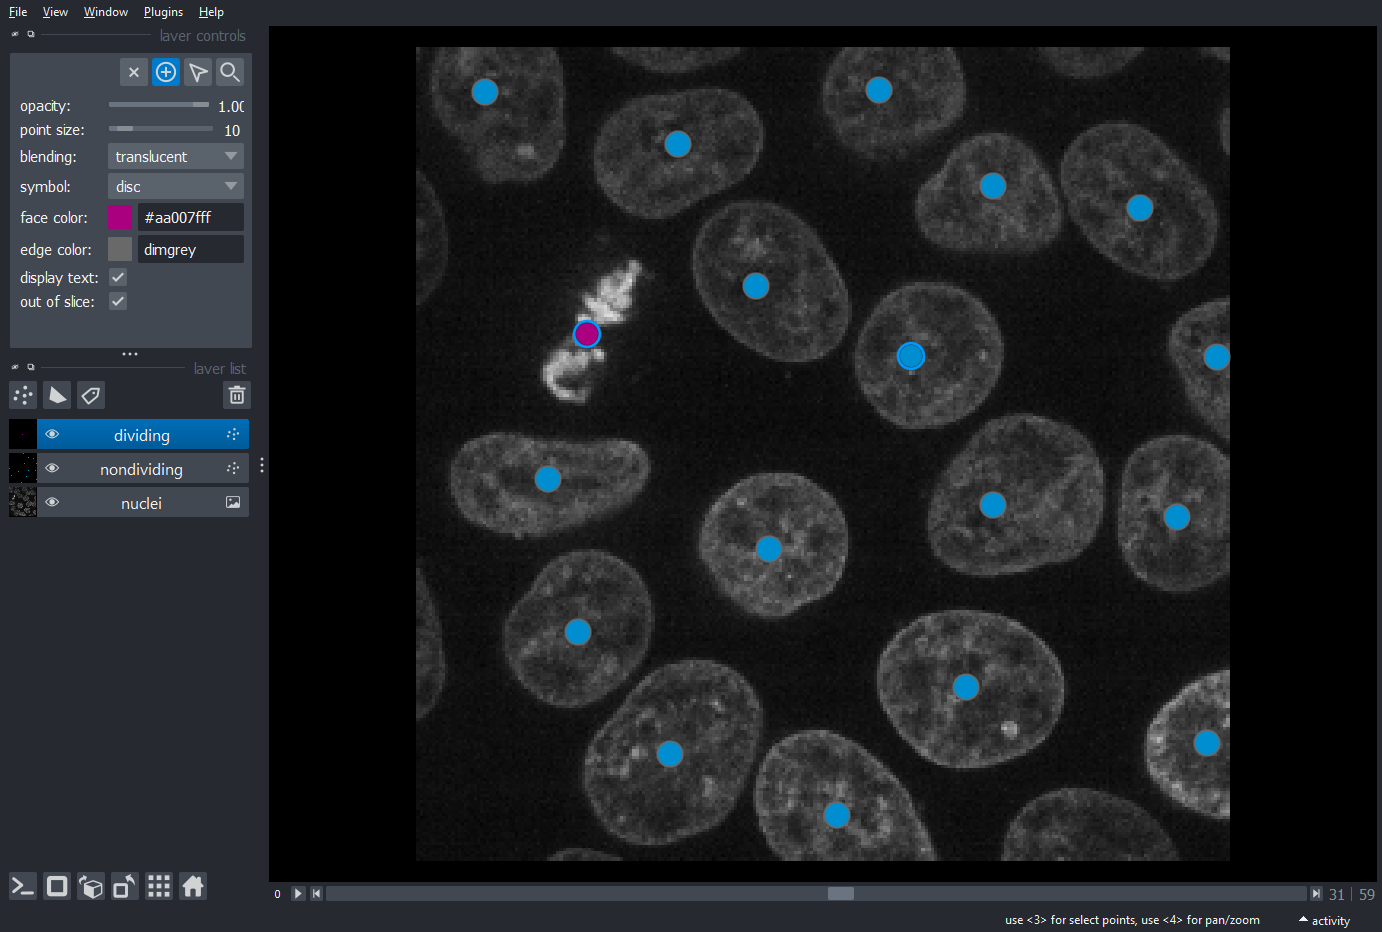

In [7]:
nbscreenshot(viewer)

Or in 3D, which can be enabled by clicking 3D rendering button (which looks like a wireframe of a cube, second from the left) like this:

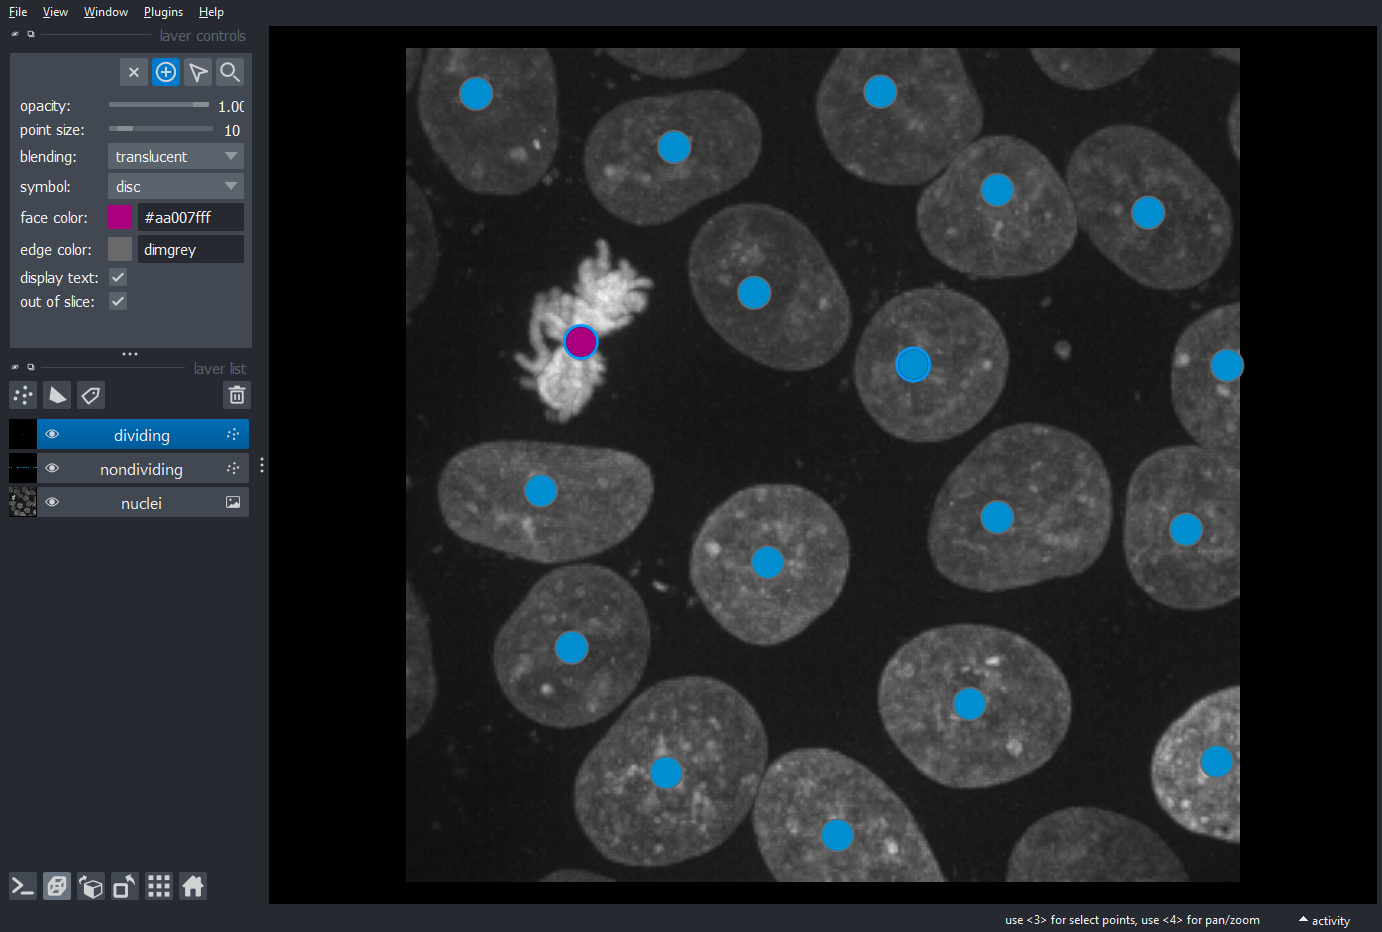

In [8]:
nbscreenshot(viewer)

You can also get the number of cells of each class and an array of their centers as follows:

In [9]:
print('Number of dividing cells:', len(viewer.layers['dividing'].data))
print('Number of nondividing cells:', len(viewer.layers['nondividing'].data))

Number of dividing cells: 1
Number of nondividing cells: 17


In [10]:
# Locations of nondividing cells
viewer.layers['nondividing'].data

array([[ 30.        , 135.37014061,  40.92843028],
       [ 30.        , 183.53541289,  50.37260131],
       [ 30.        , 221.94170842,  79.33472581],
       [ 30.        , 241.14485619, 131.9072779 ],
       [ 30.        , 200.84972645, 172.51721335],
       [ 30.        , 157.40653969, 110.50049023],
       [ 30.        , 143.55508884, 181.01696728],
       [ 30.        , 147.33275726, 238.94121629],
       [ 30.        , 218.47884571, 248.38538732],
       [ 30.        ,  96.96384508, 251.53344433],
       [ 30.        ,  50.05779561, 227.29340534],
       [ 30.        ,  43.13207018, 181.01696728],
       [ 30.        ,  12.91072288, 145.12911735],
       [ 30.        ,  29.91023074,  81.85317142],
       [ 30.        ,  13.54033428,  21.0956711 ],
       [ 30.        ,  74.6126403 , 106.40801611],
       [ 30.        ,  96.64903938, 155.20289979]])

To save a `csv` file with these values for each layer you can use our builtin writer functionality. Note these csv files can easily be opened up into tools like excel for further analysis.

In [12]:
# Save out Points layer data to a csv file
viewer.layers['dividing'].save('dividing.csv', plugin='napari');
viewer.layers['nondividing'].save('non-dividing.csv', plugin='napari');

We are working on additional features for the `Points` layer like a properties dictionary that would enable you to just one layer with points that can then have many attributes like `dividing` or `non-dividing`. You can learn more about the these advanced points annotations from the [tutorial](https://napari.org/tutorials/applications/annotate_points).

## Drawing polygons around cells

Another common task for research biologists and bioimage analysts is drawing polygons around regions of interest, in this case nuclei. These polygons might be used for segmentation and to quantify properties of interest.

For this example we'll work with a 2D maximum intensity projection of our cells in order to keep things simple. We can take the data we've already loaded into napari and use it for the projection.

In [13]:
# Take the maximum intensity projection of the cells
nuclei_mip = viewer.layers['nuclei'].data.max(axis=0)

In [14]:
# Remove select and remove all the current layers from the viewer
viewer.layers.select_all()
viewer.layers.remove_selected()

In [15]:
# Add in the maximum intensity projection
viewer.add_image(nuclei_mip);

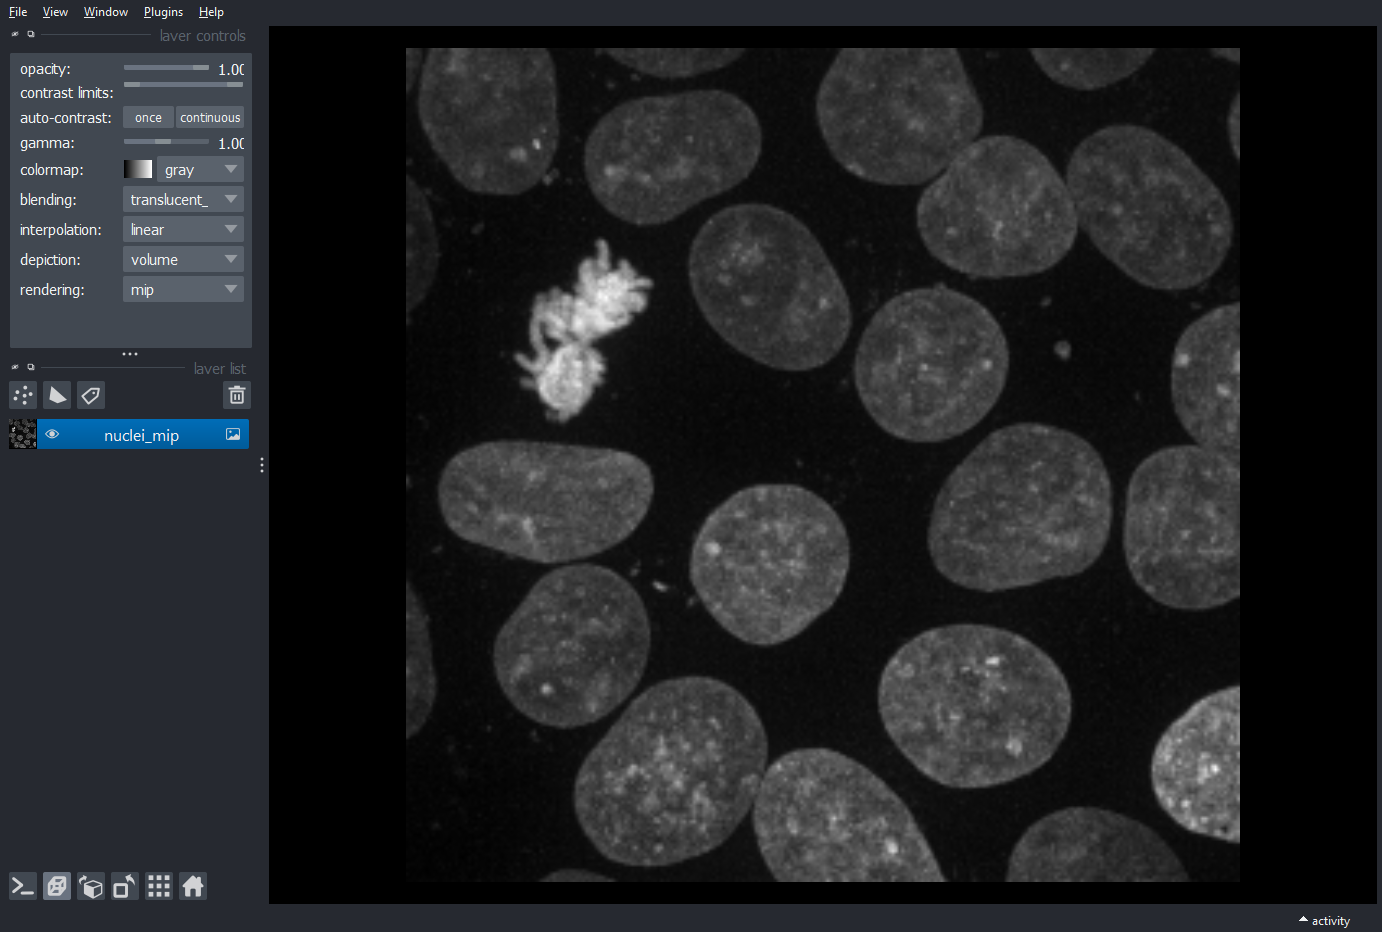

In [16]:
nbscreenshot(viewer)

We can now add an empty new shapes layer from the GUI using the new shapes button (middle of the left panel, 2nd from the left with a polygon on it) or programatically from the notebook.

In [17]:
viewer.add_shapes(name='nuclei outlines', face_color='red', edge_color='white', opacity=0.25, ndim=2);

c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
c:\ProgramData\Anaconda3\envs\napari-env\lib\

Notice now in top left corner of the viewer we have a new controls panel corresponding to the shapes layer with buttons for creating and editing shapes. They include a select mode for dragging and resizing shapes, a direct select mode for dragging vertices, tools for adding and subtracting vertices from existing shapes, buttons for reordering shapes, and tools for drawing lines, ellipses, rectangles, paths, and polygons.

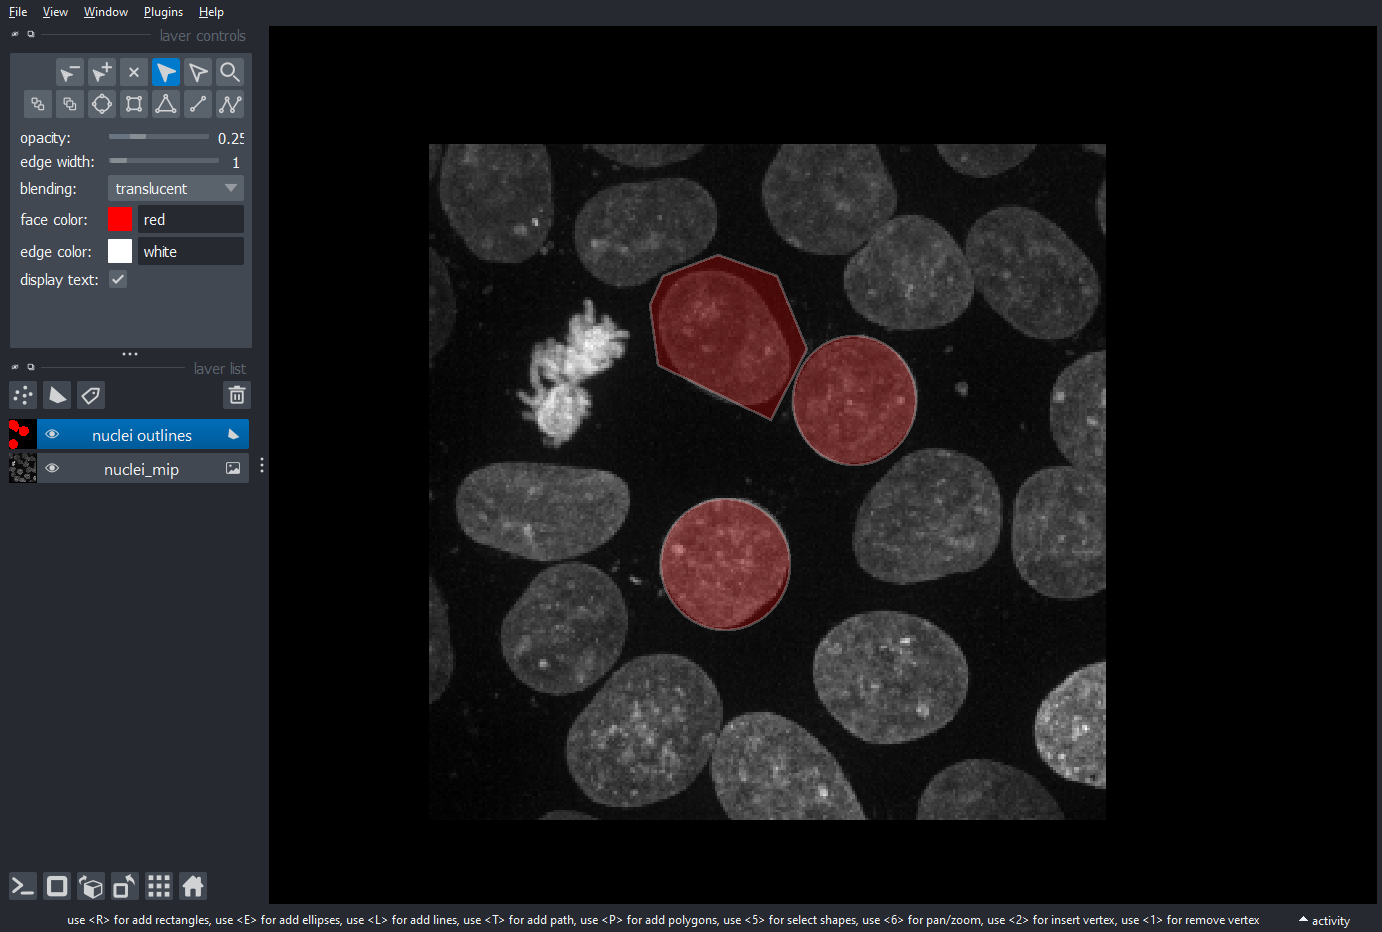

In [18]:
nbscreenshot(viewer)

We will draw some shapes with the polygon tool around a couple of different nuclei.

In [ ]:
nbscreenshot(viewer)

The vertices for these shapes can be obtained from the shapes layer as follows:

In [19]:
# The list of vertices for each shape
viewer.layers['nuclei outlines'].data

[array([[ 60.55010624,  83.01105177],
        [ 83.25174458,  86.03793688],
        [104.06157973, 128.79268909],
        [ 77.19797436, 142.4136721 ],
        [ 49.57764771, 131.06285293],
        [ 41.63207429, 108.73957522],
        [ 49.57764771,  87.92974008]]),
 array([[133.95207022,  87.1730188 ],
        [133.95207022, 135.98154124],
        [183.51731393, 135.98154124],
        [183.51731393,  87.1730188 ]]),
 array([[ 72.27928605, 183.65498176],
        [ 72.27928605, 137.11662315],
        [121.08780849, 137.11662315],
        [121.08780849, 183.65498176]])]

Similarly to the points layer, we're working on adding support for properties dictionary to the shapes layer which would allow you to assign attributes to each shape and do things like adjust shape color based on them.

One common thing to use a shapes for is creating a binary mask or labels image where each pixel is assigned an integer label of the shape it is contained within, if any. napari provides some tooling to make these conversions easy.

In [20]:
# Convert the polygons into labels
shape = viewer.layers['nuclei_mip'].data.shape
nuclei_labels = viewer.layers['nuclei outlines'].to_labels(labels_shape=shape)

print('Number of labels:', nuclei_labels.max())

Number of labels: 3


We can now add this labels image to the viewer as a labels layer.

In [21]:
# Add the cell segmenation labels as a labels layer
viewer.add_labels(nuclei_labels,opacity=0.3);

# Turn off the visibility of the shapes layer so as not to get confused
viewer.layers['nuclei outlines'].visible = False

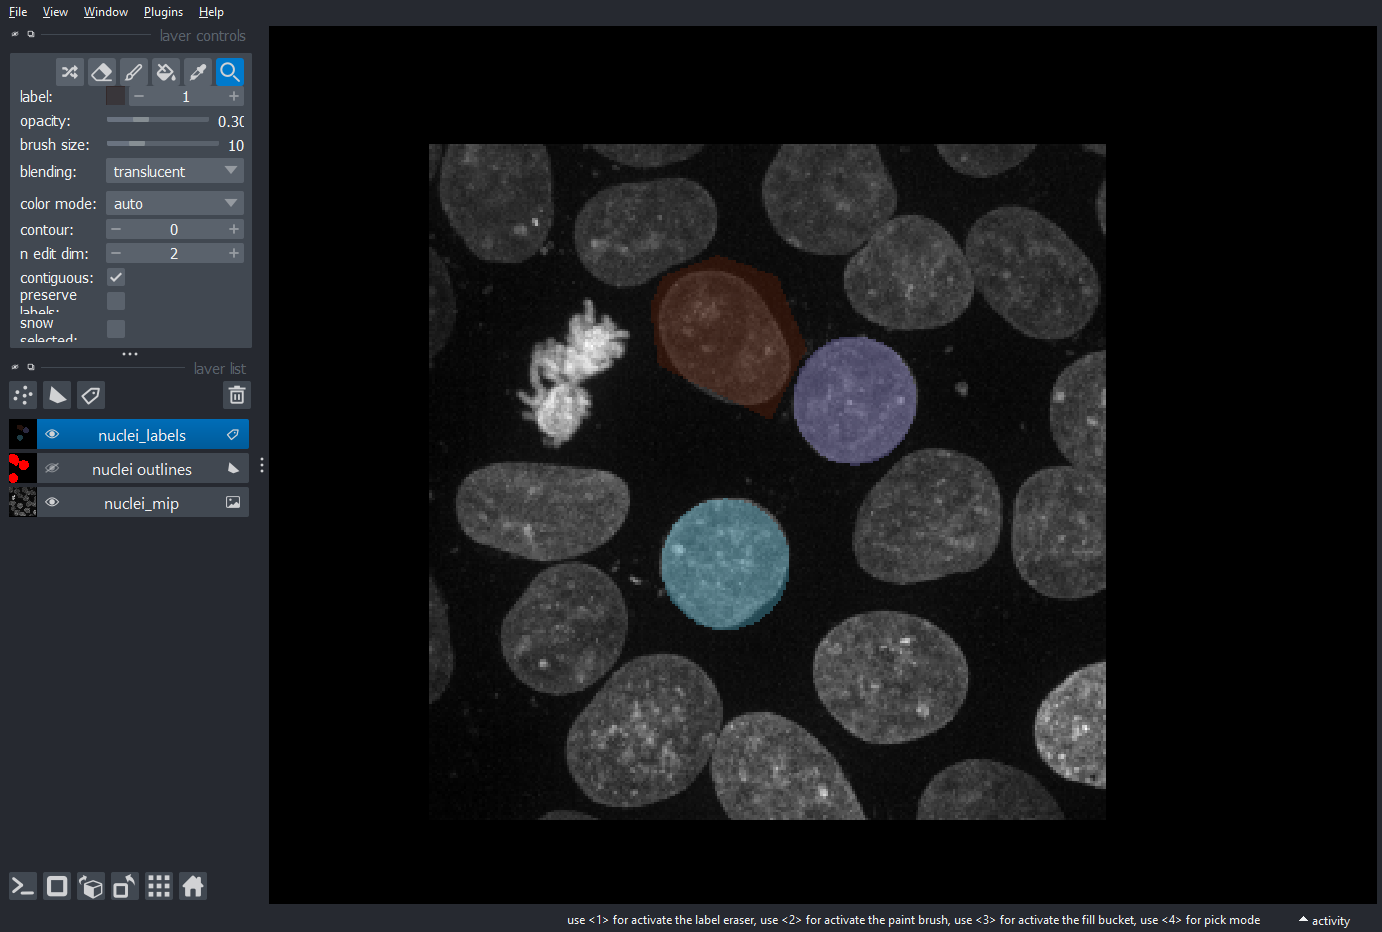

In [22]:
nbscreenshot(viewer)

## Painting labels for pixel-wise annotations

With the labels layer we can now make pixel-wise annotaions using a paintbrush, fill bucket, and eraser tools (see the row of buttons in the control panel in the top left of the viewer).

Using these tools we can touch up any of the labels that we got from our polygon masks or draw entirely new ones.

In [ ]:
nbscreenshot(viewer)

We can save out these labels to image formats like `tif` using our builtin plugin writer. Note that these can

In [ ]:
# Save out the nuclei labels as a tiff file
viewer.layers['nuclei_labels'].save('nuclei-labels.tif', plugin='napari');

In [ ]:
# Note that the cell labels could be reloaded into the viewer as follows
viewer.open('nuclei-labels.tif', name='saved nuclei', plugin='napari');

viewer.layers['nuclei_labels'].visible = False

In [ ]:
nbscreenshot(viewer)

One simple thing someone might want to do is quantify the total amount of signal inside our original image relative to the total amount of area for each of our labels. Using some basic python command we can easily do this as follows: 

In [ ]:
n_labels = viewer.layers['nuclei_labels'].data.max()

ratios = []
for label_id in range(n_labels):
    inside_pixels = viewer.layers['nuclei_labels'].data == label_id
    area = inside_pixels.sum()
    signal = viewer.layers['nuclei_mip'].data[inside_pixels].sum()
    ratios.append(signal / area)
    
print('Signal per unit area for our labels:', ratios)

As with the points and shapes layers we are current adding support for a properties dictionart to the labels layer to make it easy to attach annotations per labeled region.

## Conclusions

We've now seen how to use the **Points**, **Shapes**, and **Labels** layers to produce manual annotations in napari and save those annotations in meaningful formats.

The next lessons will teach us how to perform interactive analyses in napari and more!